In [1]:
import torch
from torch import nn
import torchvision
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm

from torchvision import datasets, transforms

/home/shirshak/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [2]:
from pathlib import Path
image_dir = Path("/home/shirshak/0 0 0 0SPARK AI academy/week3/Week 3-4 _ Workshop _ Introduction to Convolutional Neural Networks(CNN)/Data/Brain_Tumor_Dataset")
train_dir = image_dir/'Training'
test_dir = image_dir/'Testing'


train_dir, test_dir

(PosixPath('/home/shirshak/0 0 0 0SPARK AI academy/week3/Week 3-4 _ Workshop _ Introduction to Convolutional Neural Networks(CNN)/Data/Brain_Tumor_Dataset/Training'),
 PosixPath('/home/shirshak/0 0 0 0SPARK AI academy/week3/Week 3-4 _ Workshop _ Introduction to Convolutional Neural Networks(CNN)/Data/Brain_Tumor_Dataset/Testing'))

In [3]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 124x124
    transforms.Resize(size=(124, 124)),
    # convert images to grayscale
    transforms.Grayscale(),
    transforms.ToTensor() # Turn the image into a torch.Tensor and converts all pixel values from 0 to 255 to be between 0.0 and 1.0
])
# data_transfrom(img)

In [4]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 50
    Root location: /home/shirshak/0 0 0 0SPARK AI academy/week3/Week 3-4 _ Workshop _ Introduction to Convolutional Neural Networks(CNN)/Data/Brain_Tumor_Dataset/Training
    StandardTransform
Transform: Compose(
               Resize(size=(124, 124), interpolation=bilinear, max_size=None, antialias=True)
               Grayscale(num_output_channels=1)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 41
    Root location: /home/shirshak/0 0 0 0SPARK AI academy/week3/Week 3-4 _ Workshop _ Introduction to Convolutional Neural Networks(CNN)/Data/Brain_Tumor_Dataset/Testing
    StandardTransform
Transform: Compose(
               Resize(size=(124, 124), interpolation=bilinear, max_size=None, antialias=True)
               Grayscale(num_output_channels=1)
               ToTensor()
           )


In [5]:
# Get class names as a list
class_names = train_data.classes
class_names

['NO', 'YES']

In [6]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
train_loader = DataLoader(dataset= train_data,# _______ fill in the dataset,
                              batch_size=1, # ___ specify the batch size to use (how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_loader = DataLoader(dataset=test_data,
                             batch_size=1,
                             num_workers=1,
                             shuffle=False) # don't usually need to shuffle testing data

train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x7d3de3781ff0>,
 <torch.utils.data.dataloader.DataLoader at 0x7d3de3782680>)

### Exe 1.1

##### Implement a convolutional autoencoder model using PyTorch, where the encoder part consists of a convolutional layer, and the decoder part consists of a transpose convolutional layer.

Instructions:

1. Define the Model class that inherits from nn.Module and implements the convolutional and transpose convolutional layers.
2. In the forward method of the Model class, apply the convolutional layer to the input images, followed by the transpose convolutional layer.
3. Create an instance of the Model class and apply it to a batch of images from the train_loader dataset.
4. Plot the original, convolved, and de-convolved images.
5. Print the shapes of the input images, convolved images, and de-convolved images.


torch.Size([1, 1, 124, 124])
torch.Size([1])
torch.Size([1, 1, 124, 124])
torch.Size([1, 1, 247, 247])


Text(0.5, 1.0, 'Deconv Image')

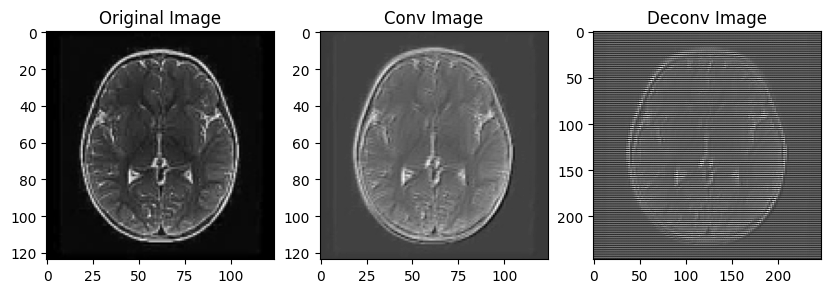

In [7]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=1,kernel_size=3,stride=1,padding=1)
        self.transconv = nn.ConvTranspose2d(in_channels=1, out_channels=1, kernel_size=3,stride=2,padding=1)
    def forward(x):
        x_conv = self.conv(x)
        x_transposed = self.conv(x_conv)
        return x_conv, x_deconv
model = Model()
images, labels = next(iter(train_loader))

conv_images = model.conv1(images)
deconv_images = model.transconv(conv_images)

print(images.shape) #torch.Size([1, 1, 124, 124])
print(labels.shape) #torch.Size([1])
print(conv_images.shape) #torch.Size([1, 1, 124, 124])
print(deconv_images.shape) #torch.Size([1, 1, 247, 247])

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(images.squeeze(),cmap='gray')
plt.title("Original Image")
plt.subplot(1,3,2)
plt.imshow(conv_images.detach().squeeze(),cmap='gray')
plt.title("Conv Image")
plt.subplot(1,3,3)
plt.imshow(deconv_images.detach().squeeze(),cmap='gray')
plt.title("Deconv Image")

### Exe 1.2
##### Implement a Convolutional Autoencoder Model using PyTorch

## Instructions:

1. Define the `Model` class that inherits from `nn.Module` and implements the convolutional and transpose convolutional layers.
2. In the `forward` method of the `Model` class, apply the convolutional layer to the input images, followed by the transpose convolutional layer.
3. Create an instance of the `Model` class and apply it to a batch of images from the `train_loader` dataset.
4. Plot the original, convolved, and de-convolved images using the provided code snippet.
5. Print the shapes of the input images, convolved images, and de-convolved images.


In [8]:
# Same question as Qn 1 

### Exe 1.3

##### Implement a Convolutional Neural Network (CNN) Model with Custom Blur Kernel

## Instructions:

1. Define the custom 3x3 blur kernel/filter using the provided code snippet, with the missing values to be filled in by the student.
2. Apply the convolution filter to the input images using PyTorch's `torch.nn.functional.conv2d()` function, with the missing arguments to be filled in by the student.
3. Plot the original and convolved images.


torch.Size([3, 3])
torch.Size([1, 1, 124, 124])
torch.Size([1, 1, 124, 124])


Text(0.5, 1.0, 'Conv Image')

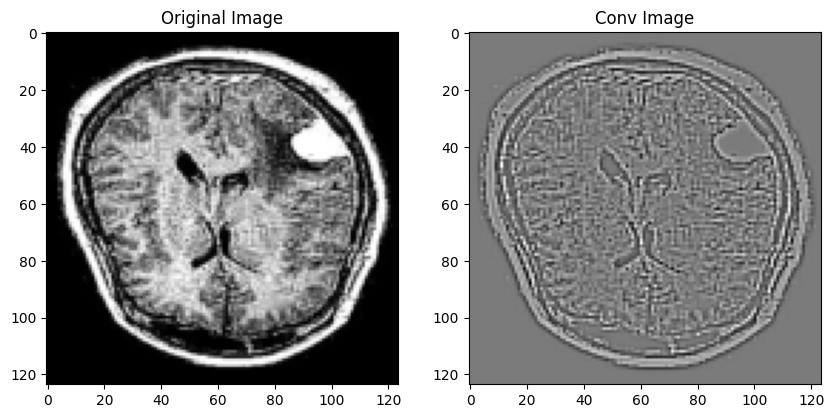

In [9]:
# Define a convolution filter (3x3)
filter = torch.tensor([[-1,-1,-1],
                      [-1,8,-1],
                      [-1,-1,-1]],dtype=torch.float32)
print(filter.shape)
filter = filter.unsqueeze(0).unsqueeze(0) # As the filter is of only 2 dimensional, but there are 4 dimensional input so making it 4 dimensional

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=1,kernel_size=3,stride=1,padding=1)
        # we make the filter learnable
        self.conv1.weight = nn.Parameter(filter)
        self.conv1.bias = nn.Parameter(torch.zeros(1)) # No bias in this convolution
    def forward(self,x):
        x = self.conv1(x)
        return x
model = Model()
images,labels = next(iter(train_loader))
conv_images = model(images)

print(images.shape)
print(conv_images.shape)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(images.squeeze(), cmap='gray')
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(conv_images.squeeze().detach(), cmap='gray')
plt.title("Conv Image")

### Exe 1.4

##### Extend TinyVGG Model with Additional Layers and Evaluate Performance

## Instructions:

1. Modify the `TinyVGG` class by adding at least 2 more convolutional, ReLU, and max pooling layers using PyTorch's `nn.Sequential` module.
2. Train and evaluate the modified `TinyVGG` model on a dataset of your choice.
3. Compare the performance (e.g., accuracy, loss) of the original `TinyVGG` model and the modified `TinyVGG` model on the chosen dataset.


In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [11]:
class TinyVGG(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, out_shape:int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units, kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units,hidden_units,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units,hidden_units,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        # This is the size after we pass the conv_block_2 layer torch.Size([1, 10, 31, 31])

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*31*31, out_features=500),
            nn.Linear(in_features=500,out_features=out_shape)
        )
        
    def forward(self,x:torch.Tensor):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        # print(x.shape) # torch.Size([1, 2])
        return x

In [12]:
model = TinyVGG(input_shape=1, hidden_units=10,out_shape=len(train_data.classes)).to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)
num_epochs = 5

In [13]:
image_batch, label_batch = next(iter(train_loader))
print(image_batch.shape), print(label_batch.shape)
model(image_batch)

torch.Size([1, 1, 124, 124])
torch.Size([1])


tensor([[-0.0165, -0.0310]], grad_fn=<AddmmBackward0>)

In [14]:
for epoch in range(num_epochs):
    results = {
        "train_loss":[],
        "train_acc":[],
        "test_loss":[],
        "test_acc":[]
    }
    model.train()
    train_loss, train_acc = 0,0
    for batch, (X,y) in enumerate(tqdm(train_loader, desc=f'Train Epoch {epoch}/{num_epochs}', unit='epoch')):
        X,y = X.to(device), y.to(device)
        # print(X.shape) # torch.Size([1, 1, 124, 124])
        # print(y.shape) # torch.Size([1])
        y_pred = model(X)
        loss = loss_function(y_pred, y)
        train_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        y_pred_soft = torch.softmax(y_pred,dim=1)
        y_pred_arg = torch.argmax(y_pred_soft,dim=1)

        train_acc += (y_pred_arg == y).sum().item()/len(y)
        
    train_loss = train_loss / len(train_loader)
    train_acc = train_acc / len(train_loader)

    model.eval()
    test_loss, test_acc = 0,0
    with torch.inference_mode():
        for batch, (X,y) in enumerate(tqdm(test_loader, desc=f'Test Epoch {epoch}/{num_epochs}', unit='epoch')):
            X,y = X.to(device), y.to(device)
            y_pred_logits = model(X)
            loss = loss_function(y_pred_logits,y) # loss_fn(input, target) hunupareo where target is the always true and input is the one that is resulted from model
            test_loss += loss.item()
            y_pred_soft = torch.softmax(y_pred_logits,dim=1)
            y_pred_arg = torch.argmax(y_pred_soft,dim=1)

            test_acc += ((y_pred_arg ==y).sum().item()/len(y_pred_arg))
        test_loss = test_loss / len(test_loader)
        test_acc = test_acc / len(test_loader)

    print(
        f"Epoch: {epoch + 1} | "
        f"train_loss: {train_loss:.4f} | "
        f"train_acc: {train_acc:.4f} | "
        f"test_loss: {test_loss:.4f} | "
        f"test_acc: {test_acc:.4f}")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
    

Test Epoch 0/5: 100%|███████████████████████| 41/41 [00:00<00:00, 135.37epoch/s]


Epoch: 1 | train_loss: 1.4409 | train_acc: 0.5800 | test_loss: 0.6113 | test_acc: 0.5122


Test Epoch 1/5: 100%|███████████████████████| 41/41 [00:00<00:00, 109.80epoch/s]


Epoch: 2 | train_loss: 0.6139 | train_acc: 0.7200 | test_loss: 0.6963 | test_acc: 0.6098


Test Epoch 2/5: 100%|███████████████████████| 41/41 [00:00<00:00, 128.63epoch/s]


Epoch: 3 | train_loss: 0.5236 | train_acc: 0.7600 | test_loss: 0.4920 | test_acc: 0.7805


Test Epoch 3/5: 100%|███████████████████████| 41/41 [00:00<00:00, 122.59epoch/s]


Epoch: 4 | train_loss: 0.3622 | train_acc: 0.8800 | test_loss: 0.3237 | test_acc: 0.8293


Test Epoch 4/5: 100%|███████████████████████| 41/41 [00:00<00:00, 146.73epoch/s]

Epoch: 5 | train_loss: 0.2805 | train_acc: 0.9000 | test_loss: 0.1761 | test_acc: 0.9512


In [15]:
def make_predictions(model:torch.nn.Module, data:list, device:torch.device=device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device
            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
    return torch.stack(pred_probs)

In [16]:
import random
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)
# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 124, 124])
Test sample label: 0 (NO)


In [17]:
pred_probs = make_predictions(model=model, data=test_samples)
pred_probs[:5]

tensor([[0.9276, 0.0724],
        [0.8258, 0.1742],
        [0.9449, 0.0551],
        [0.9451, 0.0549],
        [0.4156, 0.5844]])

In [18]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([0, 0, 0, 0, 1, 0, 0, 1, 1])

In [19]:
test_labels

[0, 0, 0, 0, 0, 0, 0, 1, 1]

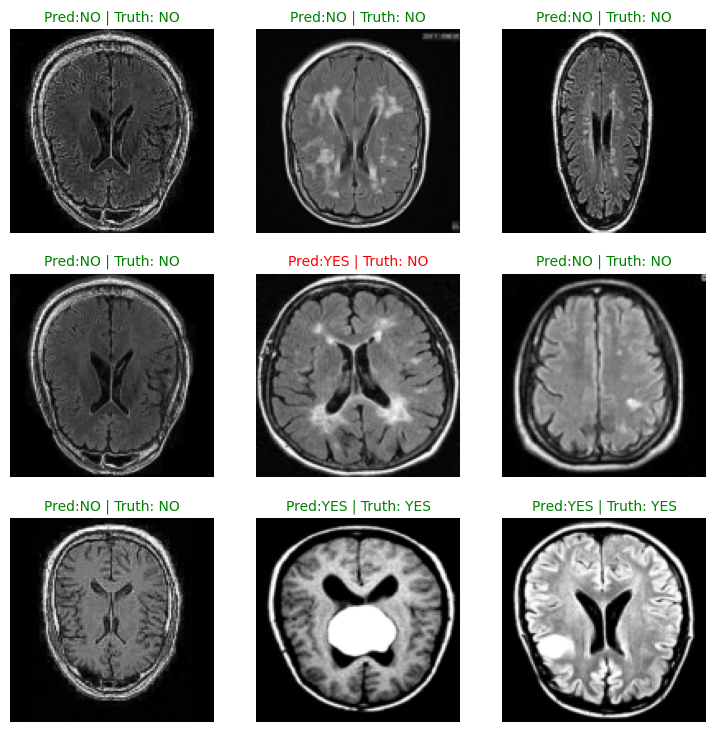

In [21]:
# Plot predictions 
plt.figure(figsize=(9, 9))
nrows = 3
ncols=3
for i, sample in enumerate(test_samples):
    plt.subplot(nrows,ncols,i+1)
    # permute to make channel at end
    sample = sample.permute(1, 2, 0)
    plt.imshow(sample.squeeze(),cmap="gray")

    # Numeric into Labels
    pred_label = class_names[pred_classes[i]]
    truth_label = class_names[test_labels[i]]

    title_text = f"Pred:{pred_label} | Truth: {truth_label}"
    if pred_label == truth_label:
        plt.title(title_text,fontsize=10,c="g")
    else:
        plt.title(title_text,fontsize=10,c="r")
    plt.axis(False)